In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.utils import to_categorical
%matplotlib inline

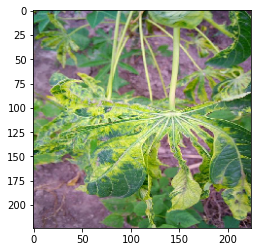

In [ ]:
img_path = '/content/drive/MyDrive/Соревнование с листьями/Новая папка/train_images/6103.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Соревнование с листьями/Новая папка/train.csv')
df.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [ ]:
labels = ['Cassava Bacterial Blight (CBB)', 'Cassava Brown Streak Disease (CBSD)',
               'Cassava Green Mottle (CGM)', 'Cassava Mosaic Disease (CMD)', 'Healthy']

In [ ]:
categorical = []
for i in range(len(df)):
  categorical.append(labels[df['label'][i]])

In [ ]:
df['category'] = categorical

In [ ]:
df

image_id  label                             category
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)
...               ...    ...                                  ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)
21395   999616605.jpg      4                              Healthy
21396   999998473.jpg      4                              Healthy

[21397 rows x 3 columns]

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.25)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/Соревнование с листьями/Новая папка/train_images",
    x_col= 'image_id',
    y_col = 'category',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=16
)

Found 16047 validated image filenames belonging to 5 classes.


In [ ]:
validation_datagen = image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/Соревнование с листьями/Новая папка/train_images",
    x_col='image_id',
    y_col='category',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=16
)

Found 5350 validated image filenames belonging to 5 classes.


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(5,  activation='softmax')
])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=validation_generator, epochs=5, verbose=1)

Epoch 1/5
1003/1003 [==============================] - 3659s 4s/step - loss: 0.9655 - accuracy: 0.6396 - val_loss: 0.9060 - val_accuracy: 0.6606
Epoch 2/5
1003/1003 [==============================] - 355s 354ms/step - loss: 0.8680 - accuracy: 0.6720 - val_loss: 0.8336 - val_accuracy: 0.6890
Epoch 3/5
1003/1003 [==============================] - 354s 353ms/step - loss: 0.8222 - accuracy: 0.6881 - val_loss: 0.8639 - val_accuracy: 0.6725
Epoch 4/5
1003/1003 [==============================] - 353s 352ms/step - loss: 0.7848 - accuracy: 0.7002 - val_loss: 0.8658 - val_accuracy: 0.6806
Epoch 5/5
1003/1003 [==============================] - 354s 353ms/step - loss: 0.7628 - accuracy: 0.7082 - val_loss: 0.7355 - val_accuracy: 0.7196


In [ ]:
[test_loss, test_acc] = model.evaluate(validation_generator)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

335/335 [==============================] - 50s 149ms/step - loss: 0.7355 - accuracy: 0.7196
Evaluation result on Test Data : Loss = 0.7354961633682251, accuracy = 0.7196261882781982


In [ ]:
from keras.backend import dropout
model1 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,  activation='softmax')
])
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_generator,validation_data=validation_generator, epochs=10, verbose=1,)

Epoch 1/10
1003/1003 [==============================] - 426s 424ms/step - loss: 1.1454 - accuracy: 0.6184 - val_loss: 1.1057 - val_accuracy: 0.6172
Epoch 2/10
1003/1003 [==============================] - 407s 406ms/step - loss: 1.0521 - accuracy: 0.6286 - val_loss: 1.3152 - val_accuracy: 0.6308
Epoch 3/10
1003/1003 [==============================] - 406s 405ms/step - loss: 1.0080 - accuracy: 0.6330 - val_loss: 1.5160 - val_accuracy: 0.2336
Epoch 4/10
1003/1003 [==============================] - 406s 405ms/step - loss: 0.9798 - accuracy: 0.6387 - val_loss: 1.6985 - val_accuracy: 0.1215
Epoch 5/10
1003/1003 [==============================] - 415s 414ms/step - loss: 0.9438 - accuracy: 0.6470 - val_loss: 1.7785 - val_accuracy: 0.1215
Epoch 6/10
1003/1003 [==============================] - 417s 416ms/step - loss: 0.9120 - accuracy: 0.6599 - val_loss: 1.9326 - val_accuracy: 0.1209
Epoch 7/10
1003/1003 [==============================] - 424s 422ms/step - loss: 0.8928 - accuracy: 0.6624 - val_

In [ ]:
[test_loss, test_acc] = model1.evaluate(validation_generator)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

335/335 [==============================] - 58s 172ms/step - loss: 1.9488 - accuracy: 0.1335
Evaluation result on Test Data : Loss = 1.948793649673462, accuracy = 0.1334579437971115


In [ ]:
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,  activation='softmax')
])
model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_generator,validation_data=validation_generator, epochs=5, verbose=1,)

Epoch 1/5
1003/1003 [==============================] - 355s 354ms/step - loss: 1.2406 - accuracy: 0.6112 - val_loss: 1.1848 - val_accuracy: 0.6155
Epoch 2/5
1003/1003 [==============================] - 357s 356ms/step - loss: 1.1980 - accuracy: 0.6148 - val_loss: 1.1825 - val_accuracy: 0.6155
Epoch 3/5
1003/1003 [==============================] - 358s 357ms/step - loss: 1.1963 - accuracy: 0.6148 - val_loss: 1.1807 - val_accuracy: 0.6155
Epoch 4/5
1003/1003 [==============================] - 353s 352ms/step - loss: 1.1916 - accuracy: 0.6148 - val_loss: 1.1787 - val_accuracy: 0.6155
Epoch 5/5
1003/1003 [==============================] - 352s 351ms/step - loss: 1.1910 - accuracy: 0.6148 - val_loss: 1.1771 - val_accuracy: 0.6155


In [ ]:
[test_loss, test_acc] = model2.evaluate(validation_generator)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

335/335 [==============================] - 58s 173ms/step - loss: 1.1771 - accuracy: 0.6155
Evaluation result on Test Data : Loss = 1.1771334409713745, accuracy = 0.6155140399932861


In [ ]:
vgg = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
last_layer = vgg.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
x = keras.layers.GlobalMaxPooling2D()(last_output)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(5, activation='softmax')(x)

In [ ]:
model = Model(vgg.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14,979,909
Trainable params: 14,979,909
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True

In [ ]:
history = model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
1003/1003 [==============================] - 425s 423ms/step - loss: 0.6830 - accuracy: 0.7439 - val_loss: 0.6110 - val_accuracy: 0.7869
Epoch 2/10
1003/1003 [==============================] - 418s 417ms/step - loss: 0.6311 - accuracy: 0.7709 - val_loss: 0.6149 - val_accuracy: 0.7938
Epoch 3/10
1003/1003 [==============================] - 419s 417ms/step - loss: 0.6011 - accuracy: 0.7798 - val_loss: 0.5609 - val_accuracy: 0.8071
Epoch 4/10
1003/1003 [==============================] - 418s 417ms/step - loss: 0.5766 - accuracy: 0.7907 - val_loss: 0.5677 - val_accuracy: 0.8050
Epoch 5/10
1003/1003 [==============================] - 418s 417ms/step - loss: 0.5516 - accuracy: 0.8015 - val_loss: 0.5358 - val_accuracy: 0.8198
Epoch 6/10
1003/1003 [==============================] - 424s 423ms/step - loss: 0.5364 - accuracy: 0.8054 - val_loss: 0.5410 - val_accuracy: 0.8168
Epoch 7/10
1003/1003 [==============================] - 419s 418ms/step - loss: 0.5109 - accuracy: 0.8160 - val_

In [ ]:
[test_loss, test_acc] = model.evaluate(validation_generator)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

335/335 [==============================] - 55s 163ms/step - loss: 0.5277 - accuracy: 0.8224
Evaluation result on Test Data : Loss = 0.5277428030967712, accuracy = 0.822429895401001


Text(0.5, 1.0, 'Accuracy Curves')

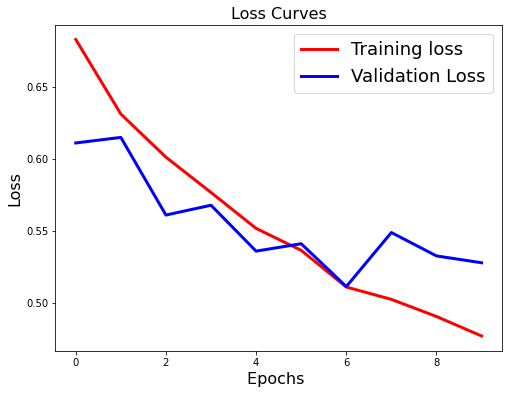

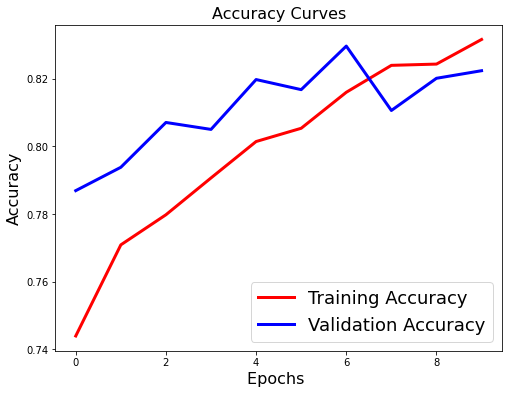

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
table_accuracy = pd.DataFrame([['Custom model + Adam', 0.738207, 0.73757]], columns=['Эксперимент', 'train accuracy', 'test accuracy'])

In [ ]:
new_row = {'Эксперимент':'Custom model + Adam + Dropout', 'train accuracy': 0.675890, 'test accuracy': 0.133458}
table_accuracy = table_accuracy.append(new_row,ignore_index=True)

In [ ]:
new_row = {'Эксперимент':'VGG16 + aug', 'train accuracy': 0.8317, 'test accuracy': 0.8224}
table_accuracy = table_accuracy.append(new_row,ignore_index=True)

In [ ]:
new_row = {'Эксперимент':'Custom model + SGD', 'train accuracy': 0.6148, 'test accuracy': 0.6155}
table_accuracy = table_accuracy.append(new_row,ignore_index=True)

In [ ]:
table_accuracy

Эксперимент  train accuracy  test accuracy
0            Custom model + Adam        0.738207       0.737570
1  Custom model + Adam + Dropout        0.675890       0.133458
2                    VGG16 + aug        0.831700       0.822400
3             Custom model + SGD        0.614800       0.615500